In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore') 



In [18]:
median_house_hold_in_come= pd.read_csv(r"C:\Users\selen\OneDrive\Masaüstü\Dataset\MedianHouseholdIncome2015.csv",encoding="windows-1252")
percentage_people_below_poverty_level= pd.read_csv(r"C:\Users\selen\OneDrive\Masaüstü\Dataset\PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
percent_over_25_completed_highSchool4= pd.read_csv(r"C:\Users\selen\OneDrive\Masaüstü\Dataset\PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
share_race_city= pd.read_csv(r"C:\Users\selen\OneDrive\Masaüstü\Dataset\ShareRaceByCity.csv",encoding="windows-1252")
kill=pd.read_csv(r"C:\Users\selen\OneDrive\Masaüstü\Dataset\PoliceKillingsUS.csv",encoding="windows-1252")
                                    

### Poverty rate of each state / Her eyaletin yoksulluk oranı

In [20]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
percentage_people_below_poverty_level.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [ ]:
percentage_people_below_poverty_level.value_counts(ascending=False)

Geographic Area  City                   poverty_rate
AK               Adak city              39.3            1
OH               Geneva city            12.2            1
                 Garrettsville village  11.1            1
                 Garfield Heights city  18.7            1
                 Gann village           33.8            1
                                                       ..
KS               Wilson city            15.8            1
                 Wilsey city            20.7            1
                 Wilroads Gardens CDP   15.7            1
                 Wilmore city           7.7             1
WY               Yoder town             5.4             1
Name: count, Length: 29329, dtype: int64

In [ ]:
percentage_people_below_poverty_level.replace(["-"], 0, inplace=True)

In [ ]:
percentage_people_below_poverty_level

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [26]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [312]:
percentage_people_below_poverty_level["poverty_rate"].replace(["-"],0, inplace=True)

In [313]:
percentage_people_below_poverty_level["poverty_rate"]=percentage_people_below_poverty_level["poverty_rate"].astype('float64')

In [311]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [310]:
poverty_list_of_states=percentage_people_below_poverty_level.groupby('Geographic Area')['poverty_rate'].mean()
poverty_list_of_states=poverty_list_of_states.sort_values(ascending=False)

    

In [309]:
poverty_list_of_states = poverty_list_of_states.reset_index()

In [308]:
poverty_list_of_states.head(5)

,Geographic Area,poverty
50,NJ,0.303558
49,WY,0.337139
48,CT,0.339883
47,MA,0.355090
46,MD,0.382097


In [175]:
poverty_list_of_states=poverty_list_of_states.rename(columns={'poverty_rate': 'mean'})
poverty_list_of_states=poverty_list_of_states.rename(columns={'mean': 'poverty'})

In [176]:
poverty_list_of_states.head()

,Geographic Area,poverty
50,NJ,0.303558
49,WY,0.337139
48,CT,0.339883
47,MA,0.355090
46,MD,0.382097


Text(0.5, 1.0, 'poverty_list_of_states')

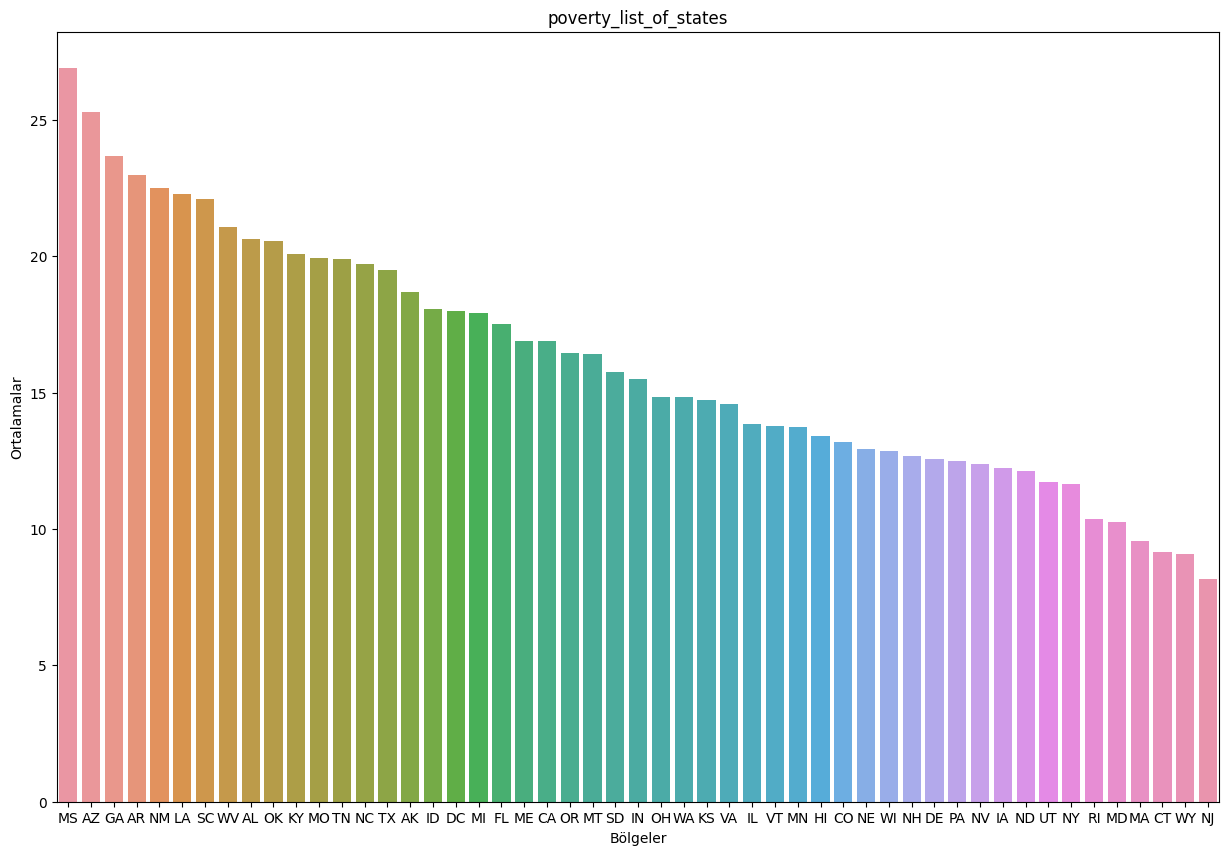

In [101]:
plt.figure(figsize=(15,10))
sns.barplot(x= poverty_list_of_states["Geographic Area"], y=poverty_list_of_states["mean"],data= poverty_list_of_states)
plt.xlabel("Bölgeler")
plt.ylabel("Ortalamalar")
plt.title("poverty_list_of_states")

### Most common 15 Name or Surname of killed people

In [ ]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
kill.name.value_counts()

name
TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: count, Length: 2481, dtype: int64

In [ ]:
seperate= kill.name[kill.name != "TK TK"].str.split() #tanımlanamayn kişileri listeden kadlırdık

In [ ]:
a,b=zip(*seperate) #isim ve soyisimleri ayırdık
name_list=a+b #burada bir table olarak birlşetirdik
name_list
name_count=Counter(name_list) #counter sınıfı nesnesi ile bir veri koleksiyonun içerindeki verilerin ne kadar tekerar ettiğni yazar
name_count

Counter({'Michael': 91,
         'David': 57,
         'James': 56,
         'Robert': 48,
         'Joseph': 48,
         'William': 47,
         'Daniel': 46,
         'John': 42,
         'Christopher': 40,
         'Lee': 37,
         'Richard': 36,
         'J.': 32,
         'Anthony': 31,
         'Jose': 28,
         'Joshua': 28,
         'Charles': 27,
         'Thomas': 26,
         'Jason': 25,
         'Matthew': 24,
         'Scott': 23,
         'Mark': 22,
         'Smith': 22,
         'Allen': 21,
         'Andrew': 20,
         'Brandon': 20,
         'Johnson': 20,
         'Kenneth': 19,
         'Paul': 19,
         'Edward': 19,
         'Jeffrey': 18,
         'A.': 18,
         'M.': 18,
         'Eric': 17,
         'Ryan': 16,
         'Kevin': 16,
         'Ray': 15,
         'D.': 15,
         'L.': 15,
         'Jeremy': 14,
         'Antonio': 14,
         'Angel': 14,
         'Steven': 14,
         'Keith': 14,
         'Patrick': 13,
         'Nicholas

In [ ]:
most_common_names=name_count.most_common(15) #most_common methotu ile en çok geçen 15 veriyi verir bizlere
most_common_names
name,sum=zip(*most_common_names)
name,sum=list(name),list(sum)


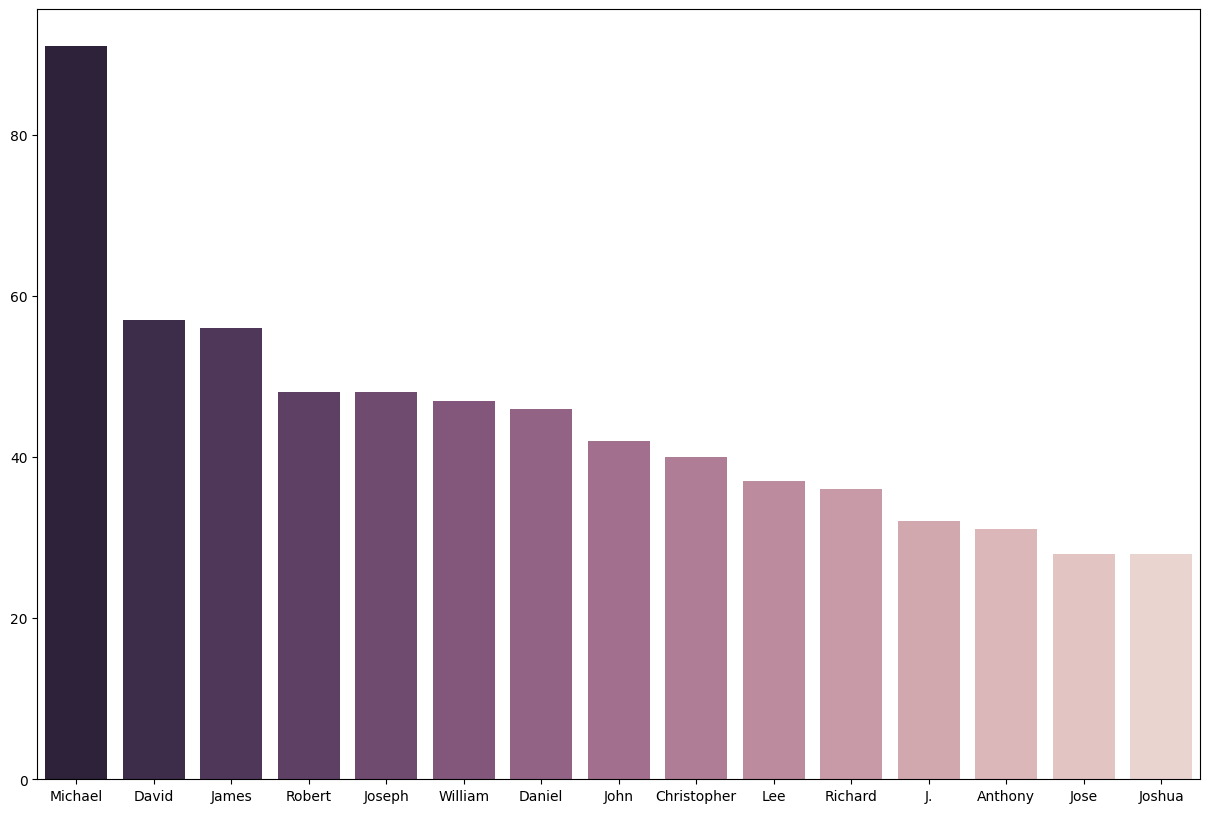

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=name,y=sum, palette=sns.cubehelix_palette(len(name),reverse=True))

###  High school graduation rate of the population that is older than 25 in states


In [54]:
percent_over_25_completed_highSchool4.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
percent_over_25_completed_highSchool4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [53]:
percent_over_25_completed_highSchool4["percent_completed_hs"]=percent_over_25_completed_highSchool4["percent_completed_hs"].replace(["-"],0)

In [52]:
percent_over_25_completed_highSchool4["percent_completed_hs"]

0        21.2
1        69.1
2        78.9
3        81.4
4        68.6
         ... 
29324     100
29325    85.6
29326    89.2
29327    79.4
29328     100
Name: percent_completed_hs, Length: 29329, dtype: object

In [ ]:
a=percent_over_25_completed_highSchool4["percent_completed_hs"]==("-")

In [55]:
true_count = a.sum()
true_count 

197

In [211]:
percent_over_25_completed_highSchool4["percent_completed_hs"]=percent_over_25_completed_highSchool4["percent_completed_hs"].astype("float64")

In [212]:
geoper=percent_over_25_completed_highSchool4.groupby("Geographic Area")["percent_completed_hs"].mean()


In [213]:
geoper=geoper.reset_index()

In [214]:
geoper.head()

,Geographic Area,percent_completed_hs
0,AK,80.098028
1,AL,80.163419
2,AR,79.949538
3,AZ,79.218182
4,CA,80.824639


In [215]:
geoper=geoper.rename(columns={"percent_completed_hs":"mean"})
geoper=geoper.rename(columns={"mean":"area_pov"})
geoper=geoper.rename(columns={"area_pov":"high_scholl"})

In [216]:
geoper.head()

,Geographic Area,high_scholl
0,AK,80.098028
1,AL,80.163419
2,AR,79.949538
3,AZ,79.218182
4,CA,80.824639


In [220]:
geoper=geoper.sort_values(by="high_scholl",ascending=False)

In [221]:
geoper.head()

,Geographic Area,high_scholl
19,MA,92.028455
11,HI,91.665563
6,CT,91.591667
21,ME,91.430769
30,NH,90.711340


Text(0, 0.5, 'Mean')

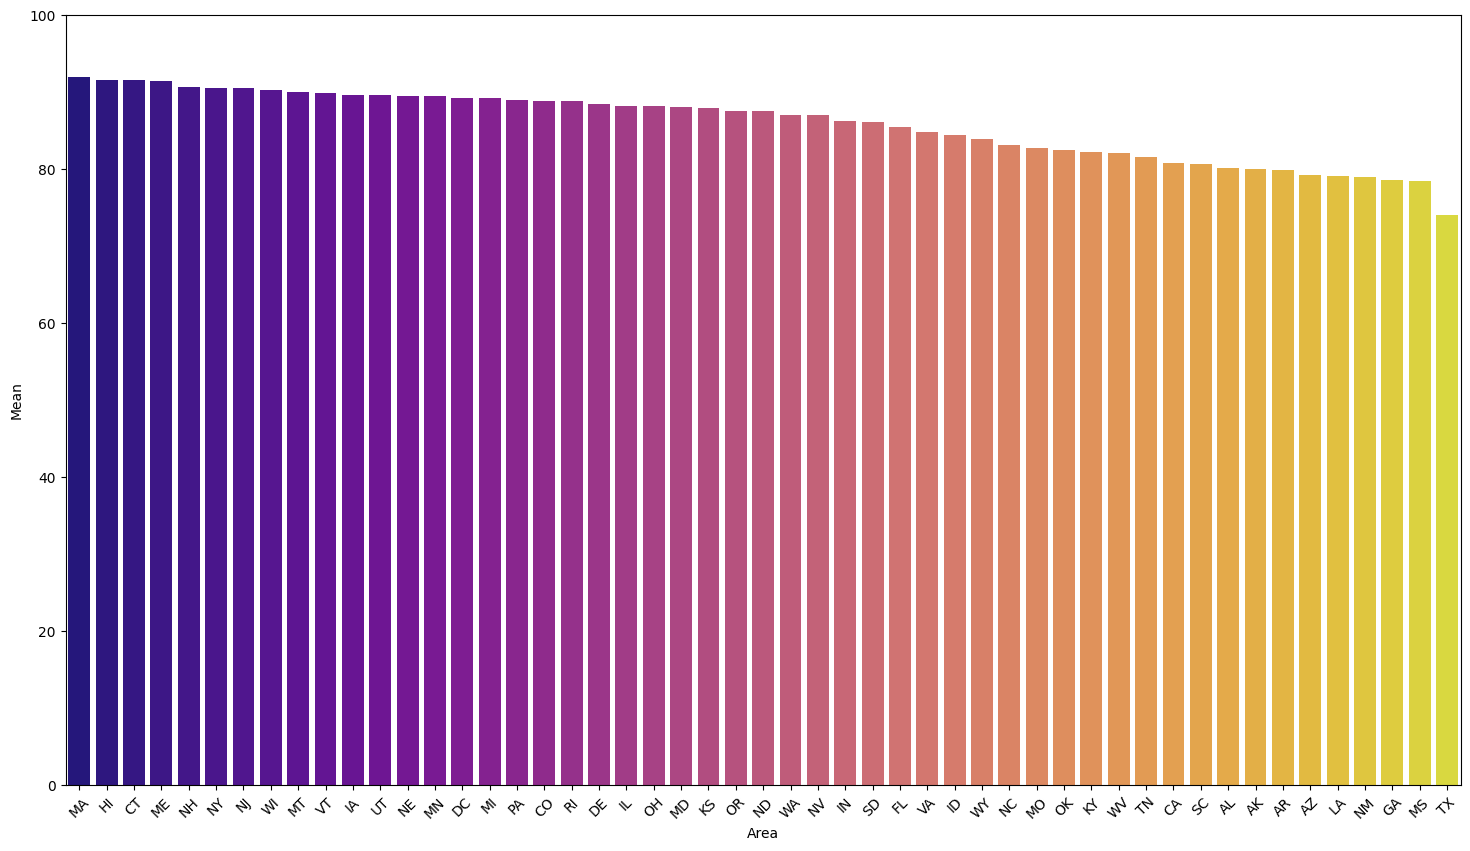

In [222]:
plt.figure(figsize=(18, 10))
plt.ylim(0, 100)
sns.barplot(x=geoper["Geographic Area"], y=geoper["high_scholl"], palette="plasma")

plt.xticks(rotation= 45) 
plt.xlabel('Area')
plt.ylabel('Mean')


### Percentage of state's population according to races that are black,white,native american, asian and hispanic


In [ ]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [45]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
b= share_race_city["share_asian"]=="(X)"
true_counts=b.sum()
true_counts #20 Tane bilinmeyen x değeri var bunları silmemiz gerekiyor


0

In [ ]:
share_race_city["share_asian"]=share_race_city["share_asian"].replace(["(X)"],0) #Yukarıdan true_counts ile kontrolettik ve 0 değeri geldi
share_race_city["share_white"]=share_race_city["share_white"].replace(["(X)"],0) #Yukarıdan true_counts ile kontrolettik ve 0 değeri geldi
share_race_city["share_black"]=share_race_city["share_black"].replace(["(X)"],0)
share_race_city["share_native_american"]=share_race_city["share_native_american"].replace(["(X)"],0)
share_race_city["share_hispanic"]=share_race_city["share_hispanic"].replace(["(X)"],0)

In [ ]:
share_race_city["share_asian"]=share_race_city["share_asian"].astype("float64")
share_race_city["share_white"]=share_race_city["share_white"].astype("float64")
share_race_city["share_black"]=share_race_city["share_black"].astype("float64")
share_race_city["share_hispanic"]=share_race_city["share_hispanic"].astype("float64")
share_race_city["share_native_american"]=share_race_city["share_native_american"].astype("float64")


share_white	share_black	share_native_american	share_asian	share_hispanic

In [ ]:
race_ratios= share_race_city.groupby("Geographic area")[["share_white","share_black","share_native_american","share_asian","share_hispanic"]].mean("Geoprahic area")
race_ratios

Alternatif kod

race_sums=share_race_city.groupby('Geographic area')[['share_white','share_black','share_native_american','share_asian','share_hispanic']].sum()
race_counts=share_race_city.groupby('Geographic area')[['share_white','share_black','share_native_american','share_asian','share_hispanic']].count()
race_ratios=race_sums/race_counts 
race_ratios

<Axes: xlabel='share_hispanic', ylabel='Geographic area'>

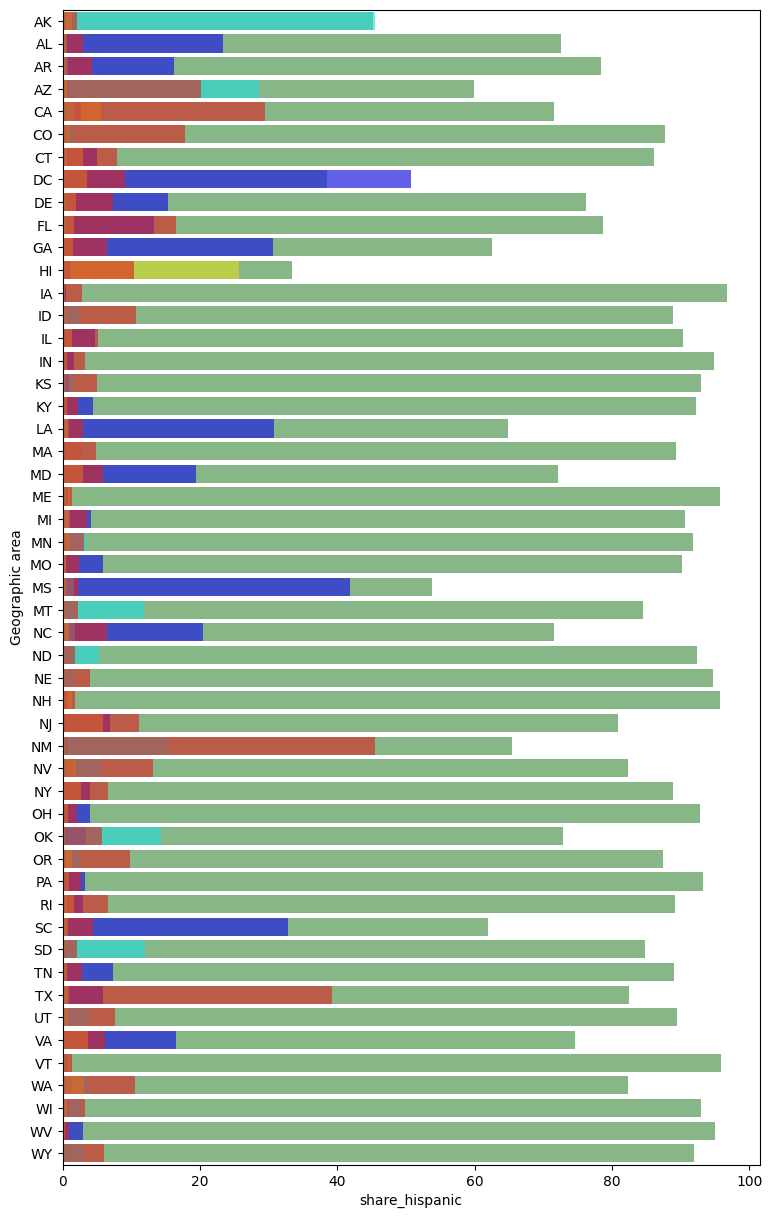

In [ ]:
plt.subplots(figsize = (9,15))
sns.barplot(x=race_ratios['share_white'],y=race_ratios.index,color='green',alpha = 0.5,label='White')
sns.barplot(x=race_ratios['share_black'],y=race_ratios.index,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=race_ratios['share_native_american'],y=race_ratios.index,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=race_ratios['share_asian'],y=race_ratios.index,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=race_ratios['share_hispanic'],y=race_ratios.index,color='red',alpha = 0.6,label='Hispanic')



### High school graduation rate vs Poverty rate of each state

In [143]:
geoper.head()

,Geographic Area,mean
43,TX,0.805044
25,MS,0.852679
10,GA,0.854458
32,NM,0.858124
18,LA,0.859760


In [200]:
poverty_list_of_states.head()

,Geographic Area,poverty
50,NJ,0.303558
49,WY,0.337139
48,CT,0.339883
47,MA,0.355090
46,MD,0.382097


In [224]:
geoper.head()

,Geographic Area,high_scholl
19,MA,92.028455
11,HI,91.665563
6,CT,91.591667
21,ME,91.430769
30,NH,90.711340


In [225]:
poverty_list_of_states["poverty"]=poverty_list_of_states["poverty"]/max(poverty_list_of_states["poverty"])
poverty_list_of_states=poverty_list_of_states.sort_values(by="poverty")



In [271]:
poverty_list_of_states.head(10)

,Geographic Area,poverty
50,NJ,0.303558
49,WY,0.337139
48,CT,0.339883
47,MA,0.355090
46,MD,0.382097
45,RI,0.385707
44,NY,0.432929
43,UT,0.436115
42,ND,0.451265
41,IA,0.454971


In [227]:
geoper["high_scholl"]=geoper["high_scholl"]/max(geoper["high_scholl"])
geoper=geoper.sort_values(by="high_scholl")

In [282]:
data1= pd.concat([geoper.set_index('Geographic Area'), poverty_list_of_states.set_index('Geographic Area')], axis=1, join='outer')


In [283]:
data1.head(10)

,high_scholl,poverty
Geographic Area,,
TX,0.805044,0.725191
MS,0.852679,1.000000
GA,0.854458,0.880204
NM,0.858124,0.837207
LA,0.859760,0.829176
AZ,0.860801,0.939884
AR,0.868748,0.854151
AK,0.870362,0.694778
AL,0.871072,0.766687


In [284]:
data1=data1.sort_values(by=["poverty","high_scholl"])

In [285]:
data1.head(20)

,high_scholl,poverty
Geographic Area,,
NJ,0.983615,0.303558
WY,0.912479,0.337139
CT,0.995254,0.339883
MA,1.000000,0.355090
MD,0.957107,0.382097
RI,0.965191,0.385707
NY,0.983804,0.432929
UT,0.974097,0.436115
ND,0.951839,0.451265


In [286]:
data1.index

Index(['NJ', 'WY', 'CT', 'MA', 'MD', 'RI', 'NY', 'UT', 'ND', 'IA', 'NV', 'PA',
       'DE', 'NH', 'WI', 'NE', 'CO', 'HI', 'MN', 'VT', 'IL', 'VA', 'KS', 'WA',
       'OH', 'IN', 'SD', 'MT', 'OR', 'CA', 'ME', 'FL', 'MI', 'DC', 'ID', 'AK',
       'TX', 'NC', 'TN', 'MO', 'KY', 'OK', 'AL', 'WV', 'SC', 'LA', 'NM', 'AR',
       'GA', 'AZ', 'MS'],
      dtype='object', name='Geographic Area')

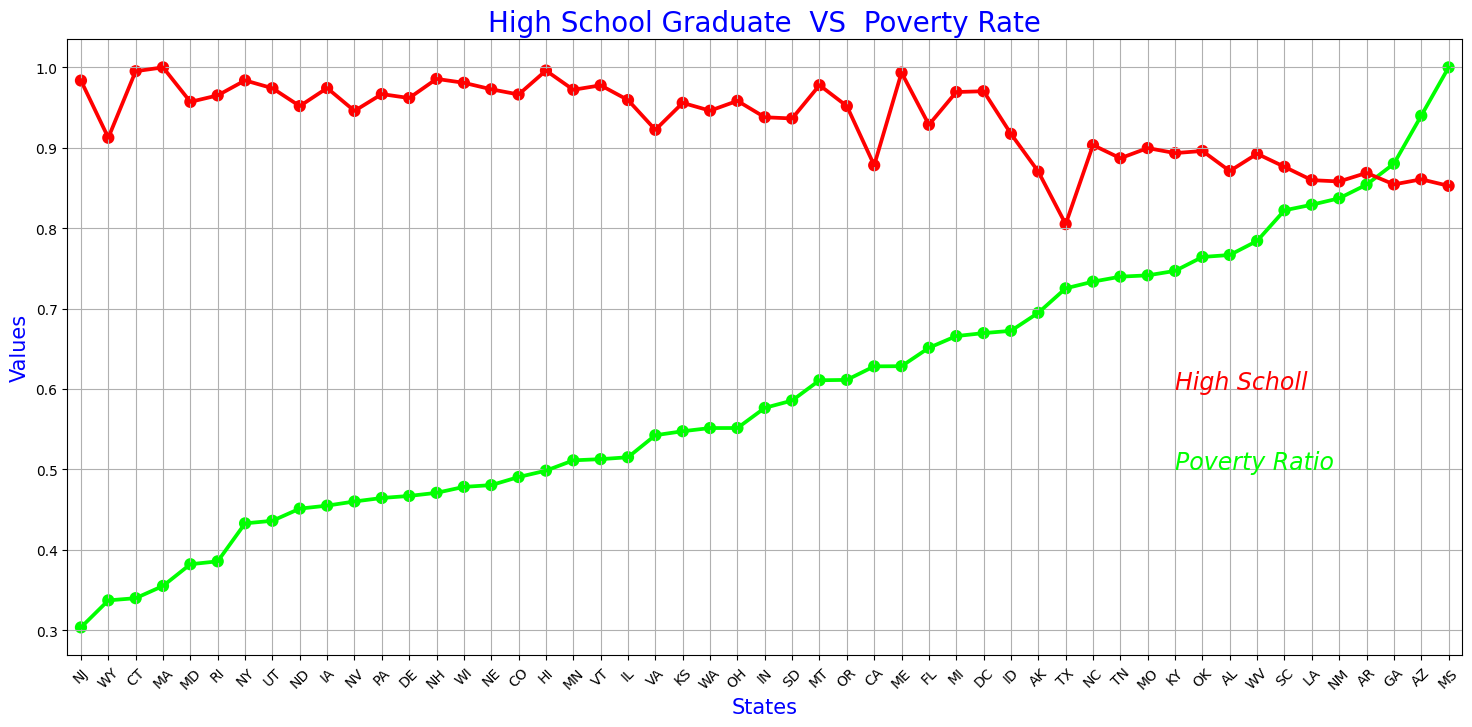

In [307]:
f,ax=plt.subplots(figsize=(18,8))
plt.xticks(rotation=45)
sns.pointplot(x=data1.index,y=data1["poverty"],data=data1,color="lime")
sns.pointplot(x=data1.index,y=data1["high_scholl"],data=data1,color="red")
plt.text(40,0.6,"High Scholl",color="red",fontsize=17,style="italic")
plt.text(40,0.5,"Poverty Ratio",color="lime",fontsize=17,style="italic")
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()